# Figure 1
Visualizing PCA clusters.

In [1]:
%run overlap_functions.ipynb
import seaborn as sns

In [2]:
# Loading DataFrame of best overlapping brain regions with RAG2 Jacobian

# Loading the comprehensive overlap dataframe of brain regions and Jacobian
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/RAG2_neg_comp_overlap_anat.csv'
overlap_df = pd.read_csv(df_path, index_col = 'Unnamed: 0')

# Sorting the dataframe by DICE coeff and resetting the index
sorted_df = overlap_df.sort_values(by=['DICE_neg_jcb_anat'], ascending=False, na_position='last')
sorted_df.reset_index(drop=True, inplace=True)

# Choosing top hits until the overlap with jacobian reaches a threshold
threshold = 0.51
thresh_df = sorted_df[sorted_df['jac_overlap_ratio'].cumsum() < threshold]

print('Last index included to reach an overlap of {} with Jacobian is {}.'\
.format(threshold, thresh_df.shape[0]))

thresh_df.head()

Last index included to reach an overlap of 0.51 with Jacobian is 15.


,full_ant_index,structure,acronym,ish_id,ant_id,in_200_atlas,region_overlap_ratio,jac_overlap_ratio,DICE_neg_jcb_anat
0,1201,"""internal capsule""","""int""",566.0,6,True,0.810606,0.071716,0.131773
1,573,"""Caudoputamen""","""CP""",83.0,672,True,0.088754,0.097855,0.093083
2,610,"""Globus pallidus, external segment""","""GPe""",127.0,1022,True,0.643617,0.040550,0.076293
3,703,"""Reticular nucleus of the thalamus""","""RT""",315.0,262,True,0.586592,0.035188,0.066393
4,1188,"""arbor vitae""","""arb""",656.0,728,True,0.117841,0.035858,0.054985


In [3]:
'''
Brain regions to add:
1. "Primary visual area, layer 5", "VISp5"
2. "Anterior cingulate area, dorsal part, layer 5", "ACAd5"
3. "Dentate gyrus, granule cell layer", "DG-sg"
4. "Locus ceruleus", "LC"
5. "Substantia nigra, compact part", "SNc"
'''
add_regions_list = ["VISp5", "ACAd5", "DG-sg", "LC", "SNc"]

# For PCA + K-means clusters

In [8]:
'''
Making a dataframe that has the overlap ratios of one brain region and clusters.
mode = DICE
'''

# Loading the anatomy file
ant_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/allen_annot200.nii'
ant_vec = nifti_to_array(ant_file)

# Selecting a brain region
region_number = 0
region_ID = [thresh_df['ant_id'][region_number]]

# Range of number of clusters
number_range = list(range(1,50))
ext_range = list(range(50,551,50))
last_number = 594
number_range.extend(ext_range)
number_range.append(last_number)

# Number of values in the range
len_range = len(number_range)

# Creating an array to store overlap ratios
score_arr = np.zeros((last_number, len_range))

# Looping over different clusters
for i, n_clusters in enumerate(number_range):
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/80_variance/Kmeans_labels/'+str(n_clusters)+'_clusters.npy'
    cluster_vec = np.load(cluster_file)
    cluster_ids = list(range(n_clusters))
    
    # Computing the overlap for the clusters
    overlap_list = overlap_function(base_arr = ant_vec, input_arr = cluster_vec,\
        base_ids_list = region_ID, input_ids_list = cluster_ids)
    
    # Adding the overlap list to the array
    score_arr[:n_clusters, i] = np.array(overlap_list)

# Converting the array to a dataframe
output_0_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
output_0_df['cluster_ID'] = range(last_number)
output_0_df.set_index('cluster_ID', inplace = True)

Maximum ratio is 0.41909814323607425 for 353 clusters.



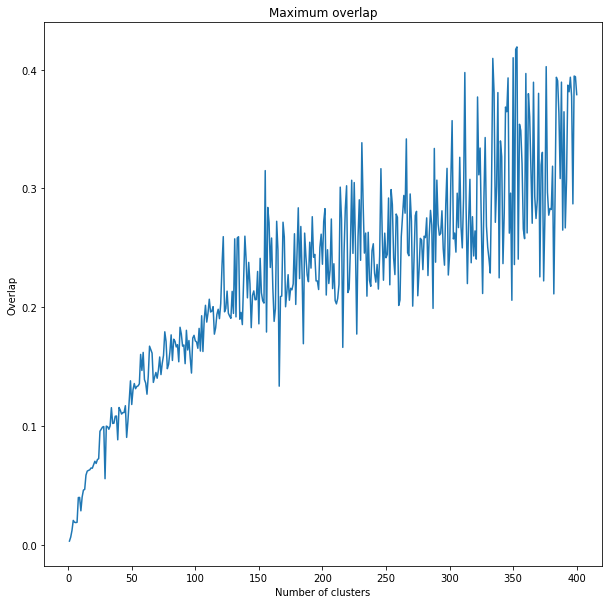

In [11]:
'''
Plotting the highest value in each experiment.
'''
# List of max overlap from each column
max_ratio_list = []

# Getting the max value and adding to the list
n_clusters = 400

for i in range(n_clusters):
    max_ratio = output_0_df.iloc[:,i].max()
    
    max_ratio_list.append(max_ratio)

# Defining x and y
x = range(1, n_clusters+1)
y = max_ratio_list

print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))+1))

# Plotting the ratios
plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of clusters")
plt.ylabel("Overlap")
plt.title("Maximum overlap")
# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()

Maximum ratio is 0.41909814323607425 for 353 clusters.



<AxesSubplot:>

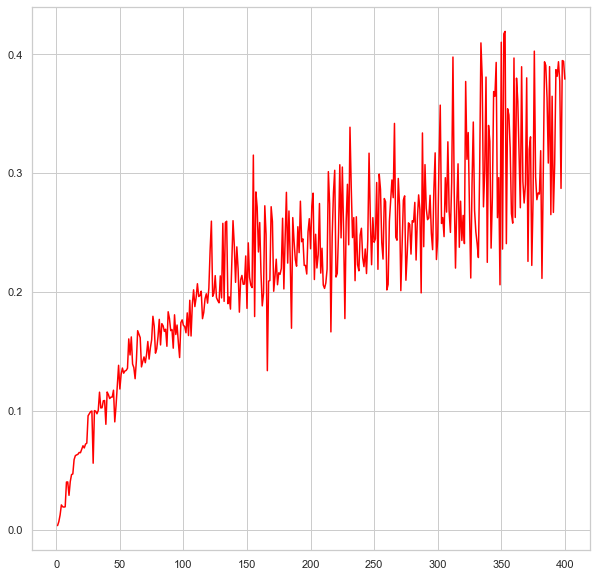

In [12]:
'''
Plotting the highest value in each experiment.
'''
# List of max overlap from each column
max_ratio_list = []

# Getting the max value and adding to the list
n_clusters = 400

for i in range(n_clusters):
    max_ratio = output_0_df.iloc[:,i].max()
    
    max_ratio_list.append(max_ratio)

# Defining x and y
x = range(1, n_clusters+1)
y = max_ratio_list

print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))+1))

# Plotting the ratios
sns.set(style="whitegrid")
sns.lineplot(x, y, color='red')

In [13]:
'''
Making a dataframe that has the overlap ratios of Jacobian and clusters,
for clusters ranging from 1 to 250.
'''

# Inputting the min, max, and step value for the number of clusters
n_max = 400

# Range of number of clusters
number_range = range(1, n_max+1)

# Creating an array to store overlap ratios
score_arr = np.zeros((n_max, n_max))

# Loading inputs to the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_binary_200.nii'
jac_vec = nifti_to_array(jac_file)

# Looping over different clusters
for n_clusters in number_range:
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/Kmeans_labels/NPY/nclusters_'+str(n_clusters)+'.npy'
    cluster_vec = np.load(cluster_file)
    cluster_ids = range(n_clusters)
    
    # Computing the overlap for the cluster
    overlap_list = overlap_function(base_arr = jac_vec, input_arr = cluster_vec,\
    input_ids_list = cluster_ids)
    
    # Adding the overlap list to the array
    score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

# Converting the array to a dataframe
output_jac_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
output_jac_df['cluster_ID'] = range(n_max)
output_jac_df.set_index('cluster_ID', inplace = True)

In [81]:
output_jac_df.head()

,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters,...,241_clusters,242_clusters,243_clusters,244_clusters,245_clusters,246_clusters,247_clusters,248_clusters,249_clusters,250_clusters
cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,0.076807,0.008083,0.004647,0.003199,0.003181,0.227976,0.101649,0.020490,0.001418,0.015841,...,0.000000,0.015618,0.002131,0.003339,0.000000,0.005709,0.000092,0.001026,0.002384,0.068023
1,0.000000,0.178179,0.119952,0.203532,0.093474,0.038419,0.002388,0.096786,0.246197,0.004618,...,0.000111,0.001028,0.000111,0.020721,0.002309,0.001024,0.043515,0.011148,0.000000,0.000000
2,0.000000,0.000000,0.183163,0.094934,0.236708,0.002334,0.109595,0.246008,0.020483,0.235648,...,0.033319,0.006315,0.000000,0.003669,0.001195,0.022765,0.004228,0.014135,0.000296,0.008679
3,0.000000,0.000000,0.000000,0.114006,0.095375,0.096320,0.091030,0.107346,0.016328,0.107012,...,0.014512,0.002357,0.005513,0.000299,0.002436,0.003259,0.000606,0.011678,0.000000,0.000602
4,0.000000,0.000000,0.000000,0.000000,0.107838,0.108115,0.040120,0.001418,0.057159,0.057190,...,0.000000,0.000904,0.001451,0.001029,0.000000,0.006106,0.004586,0.000603,0.019300,0.014172


Maximum ratio is 0.24852852852852853 for 13 clusters.



<AxesSubplot:>

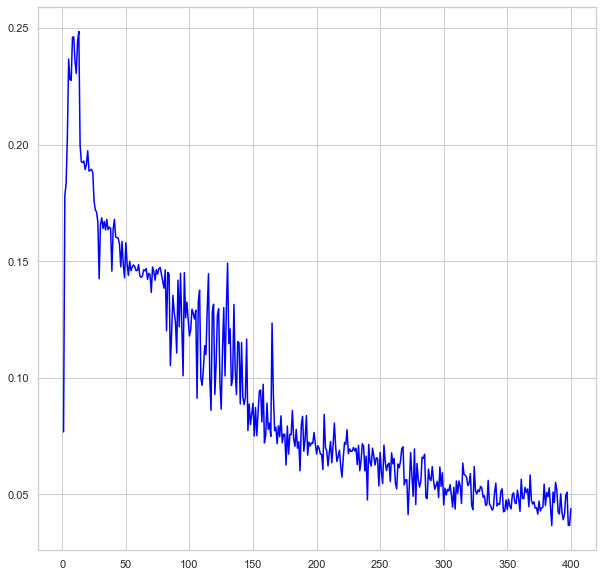

In [14]:
'''
Plotting the highest value in each experiment.
'''
# List of max overlap from each column
max_ratio_list = []

# Getting the max value and adding to the list
n_clusters = 400

for i in range(n_clusters):
    max_ratio = output_jac_df.iloc[:,i].max()
    
    max_ratio_list.append(max_ratio)

# Defining x and y
x = range(1, n_clusters+1)
y = max_ratio_list

print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))+1))

# Plotting the ratios
sns.set(style="whitegrid")
sns.lineplot(x, y, color='blue')

In [15]:
'''
This cluster can be considered as a new Jacobian.
'''
# Choosing the cluster ID to consider as new Jacobian
cluster_ID = 55

# Loading the clusters vector
cluster_file = '/data/bioprotean/ABA/PCA/Kmeans_labels/NPY/nclusters_400.npy'
cluster_vec = np.load(cluster_file)

# Masking the cluster for this ID
new_jac = np.where(cluster_vec == cluster_ID, 1, 0)

In [17]:
'''
Making a dataframe that has the overlap ratios of Jacobian and clusters,
clusters ranging from 1 to 250.
mode = DICE
'''

# Range of number of clusters
n_max = 400
number_range = range(1, n_max+1)

# Creating an array to store overlap ratios
score_arr = np.zeros((n_max, n_max))

# Looping over different clusters
for n_clusters in number_range:
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/Kmeans_labels/NPY/nclusters_'+str(n_clusters)+'.npy'
    cluster_vec = np.load(cluster_file)
    cluster_ids = list(range(n_clusters))
    
    # Computing the overlap for the cluster
    overlap_list = overlap_function(base_arr = new_jac, input_arr = cluster_vec,\
input_ids_list = cluster_ids)
    
    # Adding the overlap list to the array
    score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

# Converting the array to a dataframe
output_pos_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
output_pos_df['cluster_ID'] = range(n_max)
output_pos_df.set_index('cluster_ID', inplace = True)

Maximum ratio is 1.0 for 400 clusters.



<AxesSubplot:>

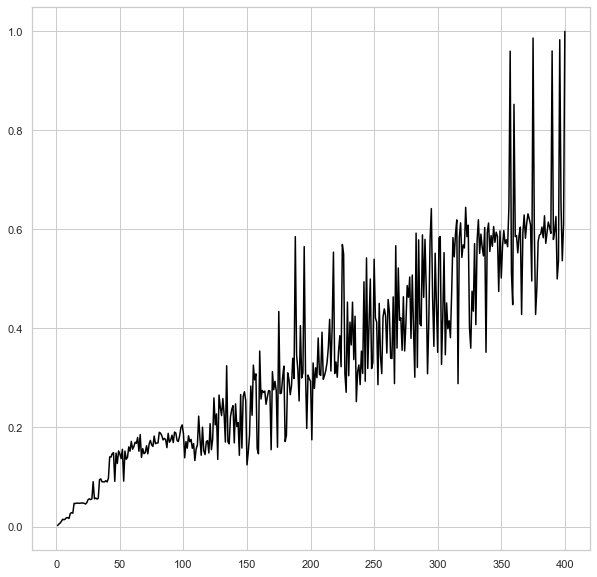

In [18]:
'''
Plotting the highest value in each experiment.
'''
# List of max overlap from each column
max_ratio_list = []

# Getting the max value and adding to the list
n_clusters = 400

for i in range(n_clusters):
    max_ratio = output_pos_df.iloc[:,i].max()
    
    max_ratio_list.append(max_ratio)

# Defining x and y
x = range(1, n_clusters+1)
y = max_ratio_list

print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))+1))

# Plotting the ratios
sns.set(style="whitegrid")
sns.lineplot(x, y, color='black')

In [19]:
# Visualizing the data using Pandas Dataframe and Seaborn
data_sns = pd.DataFrame(columns=['positive control', 'jacobian', 'internal capsule'])

In [20]:
# Adding values to the columns
n_clusters = 400

for i in range(n_clusters):
    a1 = output_pos_df.iloc[:,i].max()
    a2 = output_jac_df.iloc[:,i].max()
    a3 = output_0_df.iloc[:,i].max()
    
    a = [a1, a2, a3]
    
    data_sns.loc[i] = a

In [85]:
data_sns.head()

,pos_control,jac,anat
0,0.011023,0.076807,0.003308
1,0.017572,0.178179,0.006640
2,0.015252,0.183163,0.012269
3,0.050495,0.203532,0.020706
4,0.053420,0.236708,0.019159


<AxesSubplot:>

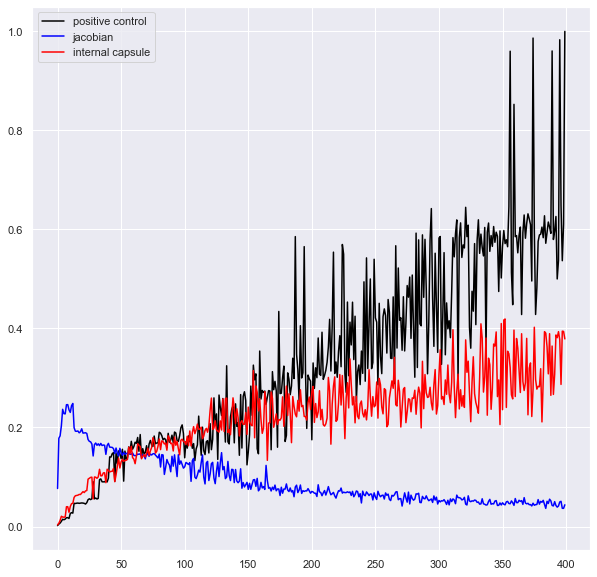

In [21]:
sns.set(style="darkgrid")
sns.lineplot(data = data_sns, dashes = False, palette=['black', 'blue', 'red'])